In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<h1 align="center"><u>Presentatie project</u></h1>
<h1 align="center">Earthquakes</h1> 

# Datasets

In [2]:
"""RAW dataset 1"""
!head -n5 data/NEIC_global_1973-2014.TXT 

	Year	Month	Day	UT-Time	Latit	Longit	Depth	Magnitude
1	1973	1	1	3,77	-9,21	150,63	41	5,3
2	1973	1	1	5,37	-15,01	-173,96	33	5
3	1973	1	1	9,48	-22,16	-65,79	205	4,8
4	1973	1	1	11,71	-35,51	-16,21	33	6


In [3]:
data19732014 = pd.read_csv(
    'data/NEIC_global_1973-2014.TXT',
    delimiter='\t',
    header=0,
    index_col=1,
    decimal=',',
    parse_dates={'time': ['Year', 'Month', 'Day']},
    usecols=[0, 1, 2, 3, 5, 6, 7, 8])

# Datasets

In [4]:
"""imported dataset 1"""
print('aantal rijen: ' + str(len(data19732014)))
data19732014.head(15)

aantal rijen: 205311


time  Latit  Longit  Depth  Magnitude
1  1973-01-01  -9.21  150.63   41.0        5.3
2  1973-01-01 -15.01 -173.96   33.0        5.0
3  1973-01-01 -22.16  -65.79  205.0        4.8
4  1973-01-01 -35.51  -16.21   33.0        6.0
5  1973-01-02  -9.85  117.43   66.0        5.5
6  1973-01-02   1.03  126.21   61.0        5.4
7  1973-01-02  18.92 -104.13   33.0        4.6
8  1973-01-02   5.40  -82.54   30.0        5.2
9  1973-01-02  71.53   -5.75   33.0        4.5
10 1973-01-02  36.08   71.31  137.0        4.8
11 1973-01-02  31.24   88.09   33.0        5.2
12 1973-01-02  71.33   -7.55   33.0        4.7
13 1973-01-03   1.55  126.31   33.0        4.8
14 1973-01-03 -27.72  -63.26  563.0        5.6
15 1973-01-03  13.47  120.83  139.0        4.8

In [5]:
data19732014.dtypes

time         datetime64[ns]
Latit               float64
Longit              float64
Depth               float64
Magnitude           float64
dtype: object

# Datasets

In [6]:
"""RAW dataset 2"""
!head -n5 data/query2015_2017.csv 

time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2015-01-01T05:01:10.640Z,38.8957,142.0405,41.39,4.8,mb,,124,1.42,0.8,us,usc000tb3v,2015-03-27T07:00:54.040Z,"34km SE of Ofunato, Japan",earthquake,7.3,6.7,0.05,149,reviewed,us,us
2015-01-01T06:48:29.670Z,-18.7052,169.1795,223.61,4.6,mb,,62,3.75,0.47,us,usc000tb42,2015-03-27T07:00:55.040Z,"93km N of Isangel, Vanuatu",earthquake,9.9,9.2,0.098,31,reviewed,us,us
2015-01-01T06:54:20.570Z,3.4769,-31.7641,10,4.7,mb,,43,10.123,0.66,us,usc000tb46,2015-03-27T07:00:55.040Z,"Central Mid-Atlantic Ridge",earthquake,10.7,1.8,0.078,64,reviewed,us,us
2015-01-01T07:12:44.230Z,-11.3818,162.4998,26.24,4.6,mb,,92,3.167,1.22,us,usc000tb4a,2015-03-27T07:00:55.040Z,"120km SSE of Kirakira, Solomon Islands",earthquake,8.7,6,0.114,24,reviewed,us,us


In [7]:
data20152017 = pd.read_csv(
    'data/query2015_2017.csv',
    usecols=['time', 'latitude', 'longitude', 'depth', 'mag'],
    parse_dates=['time'])

# Datasets

In [13]:
"""imported dataset 2"""
print('aantal rijen: ' + str(len(data20152017)))
data20152017.head(15)

aantal rijen: 19736


time  latitude   longitude   depth   mag
0  2015-01-01 05:01:10.640   38.8957  142.040500   41.39  4.80
1  2015-01-01 06:48:29.670  -18.7052  169.179500  223.61  4.60
2  2015-01-01 06:54:20.570    3.4769  -31.764100   10.00  4.70
3  2015-01-01 07:12:44.230  -11.3818  162.499800   26.24  4.60
4  2015-01-01 08:49:53.200   28.7280   51.858000   10.10  5.10
5  2015-01-01 09:42:00.670   55.2919  163.058100   10.00  4.80
6  2015-01-01 10:07:05.770  -11.7630 -111.054000   10.00  4.70
7  2015-01-01 10:08:27.740  -13.6748 -111.926800   10.00  4.80
8  2015-01-01 12:04:49.450   46.9847  152.076100   95.70  4.70
9  2015-01-01 12:16:14.570   40.4420 -125.774667   23.90  5.36
10 2015-01-01 13:57:14.670   42.5720  141.800800   36.38  4.70
11 2015-01-01 14:50:16.810   -7.7986  -73.861900  155.32  4.60
12 2015-01-01 15:07:11.150  -15.7017 -172.276100   55.19  4.70
13 2015-01-01 15:32:20.010  -22.8056 -175.798700   18.45  4.90
14 2015-01-01 16:41:57.610    8.0389  121.546600   38.99  4.50

In [14]:
data20152017.dtypes

time         datetime64[ns]
latitude            float64
longitude           float64
depth               float64
mag                 float64
dtype: object

## Samenvoegen en hernoemen columns

In [8]:
#herbenoemen columns

data19732014.rename(
    columns={
        'time': 'time',
        'Latit': 'latitude',
        'Longit': 'longitude',
        'Depth': 'depth',
        'Magnitude': 'mag'
    },
    inplace=True)

# concatenatie van beide datasets

data = pd.concat([data19732014, data20152017], ignore_index=True)

In [16]:
data.describe()

latitude      longitude          depth            mag
count  225047.000000  225047.000000  225047.000000  225047.000000
mean        4.504329      44.976216      73.841594       4.891464
std        28.934276     120.470226     118.188336       0.411592
min       -84.130000    -180.000000       0.000000       4.500000
25%       -16.800000     -71.062750      16.000000       4.600000
50%         0.714900     102.990000      33.000000       4.800000
75%        29.140000     142.740000      65.900000       5.100000
max        87.220000     180.000000     700.000000       9.100000

## Waar komen over het algemeen de meeste aardbevingen voor, op het noordelijk of het zuidelijk halfrond?

In [11]:
def all_earthquakes():
    zh = data.loc[data.latitude < 0]
    nh = data.loc[data.latitude > 0]
    evenaar = data.loc[data.latitude == 0]

    plt.style.use('dark_background')
    fig, ax = plt.subplots(figsize=(35, 15))

    nh_plot = nh.plot('longitude', 'latitude', ax=ax,
        kind='scatter',
        color='blue',
        fontsize=25,
        label='Latitude > 0')
    zh_plot = zh.plot('longitude', 'latitude', ax=ax,
        kind='scatter',
        color='magenta',
        label='Latitude < 0')
    ev_plot = evenaar.plot('longitude', 'latitude', ax=ax,
        kind='scatter',
        color='white',
        label='Latitude == 0')

    plt.ylabel('Latitude', fontsize=25)
    plt.xlabel('Longitude', fontsize=25)
    plt.title('\nAlle aardbevingen tussen 1973 en 2017\n', fontsize=45)
    plt.legend(loc=8, fontsize=22)

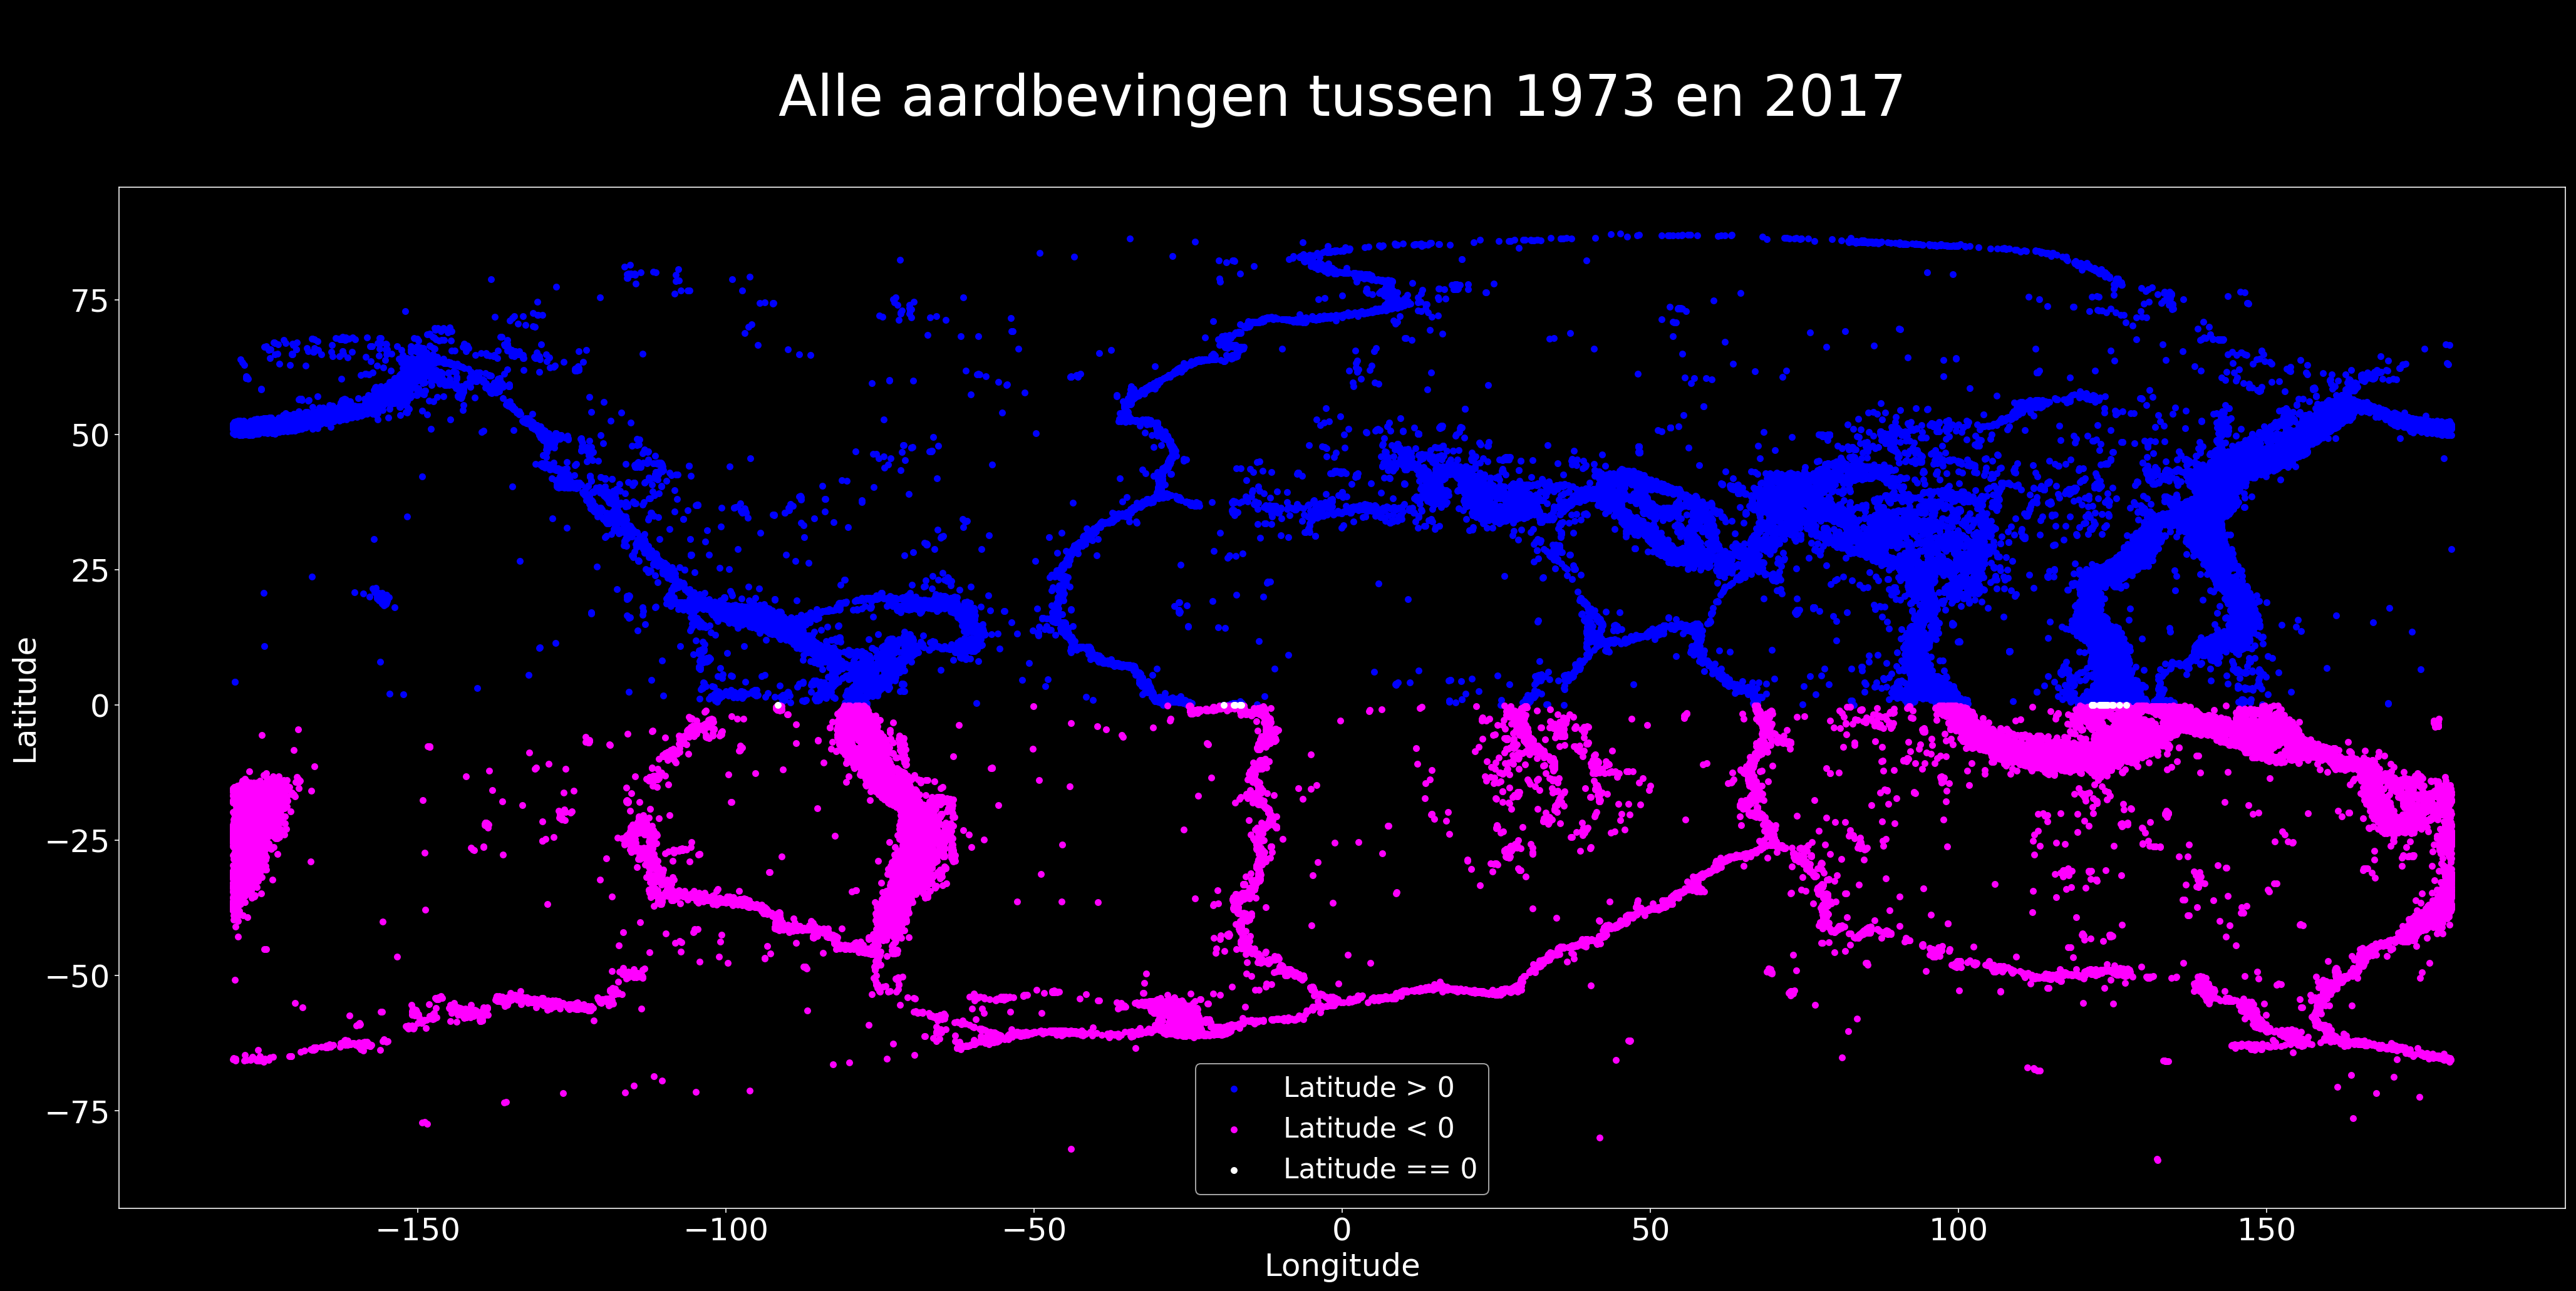

In [12]:
all_earthquakes()

## Op welke diepte komen de meeste aardbevingen voor?

In [19]:
depth_data = (       
                    data[['depth', 'mag']]
                    .groupby('depth')
                    .count()
                    .rename(columns={'mag': 'Counts'})
                    .sort_values('Counts', ascending=False)
                    .reset_index()
             )

In [21]:
depth_data.head(20)

depth  Counts
0    33.0   46481
1    10.0   43515
2    35.0    8829
3    30.0    3158
4    40.0    1191
5    20.0    1175
6    25.0    1165
7     5.0    1164
8    38.0    1109
9    42.0    1085
10   45.0    1084
11   36.0    1081
12   15.0    1072
13   37.0    1070
14   50.0    1056
15   26.0    1045
16   39.0    1039
17   28.0    1027
18   43.0    1025
19   24.0    1020

## Op welke diepte komen de meeste aardbevingen voor?

In [38]:
def plot_aantal():
    fig, ax = plt.subplots(figsize=(20,10))
    depth_data.plot('Counts', kind='hist', 
                bins=700, color='blue', 
                grid=True, legend=False, ax=ax)
    plt.xlabel('Depth')
    plt.xlim(0,700)
    plt.ylim(0,100)
    plt.title('Verdeling aantal aardbevingen naar diepte', fontsize=25)
    plt.show()

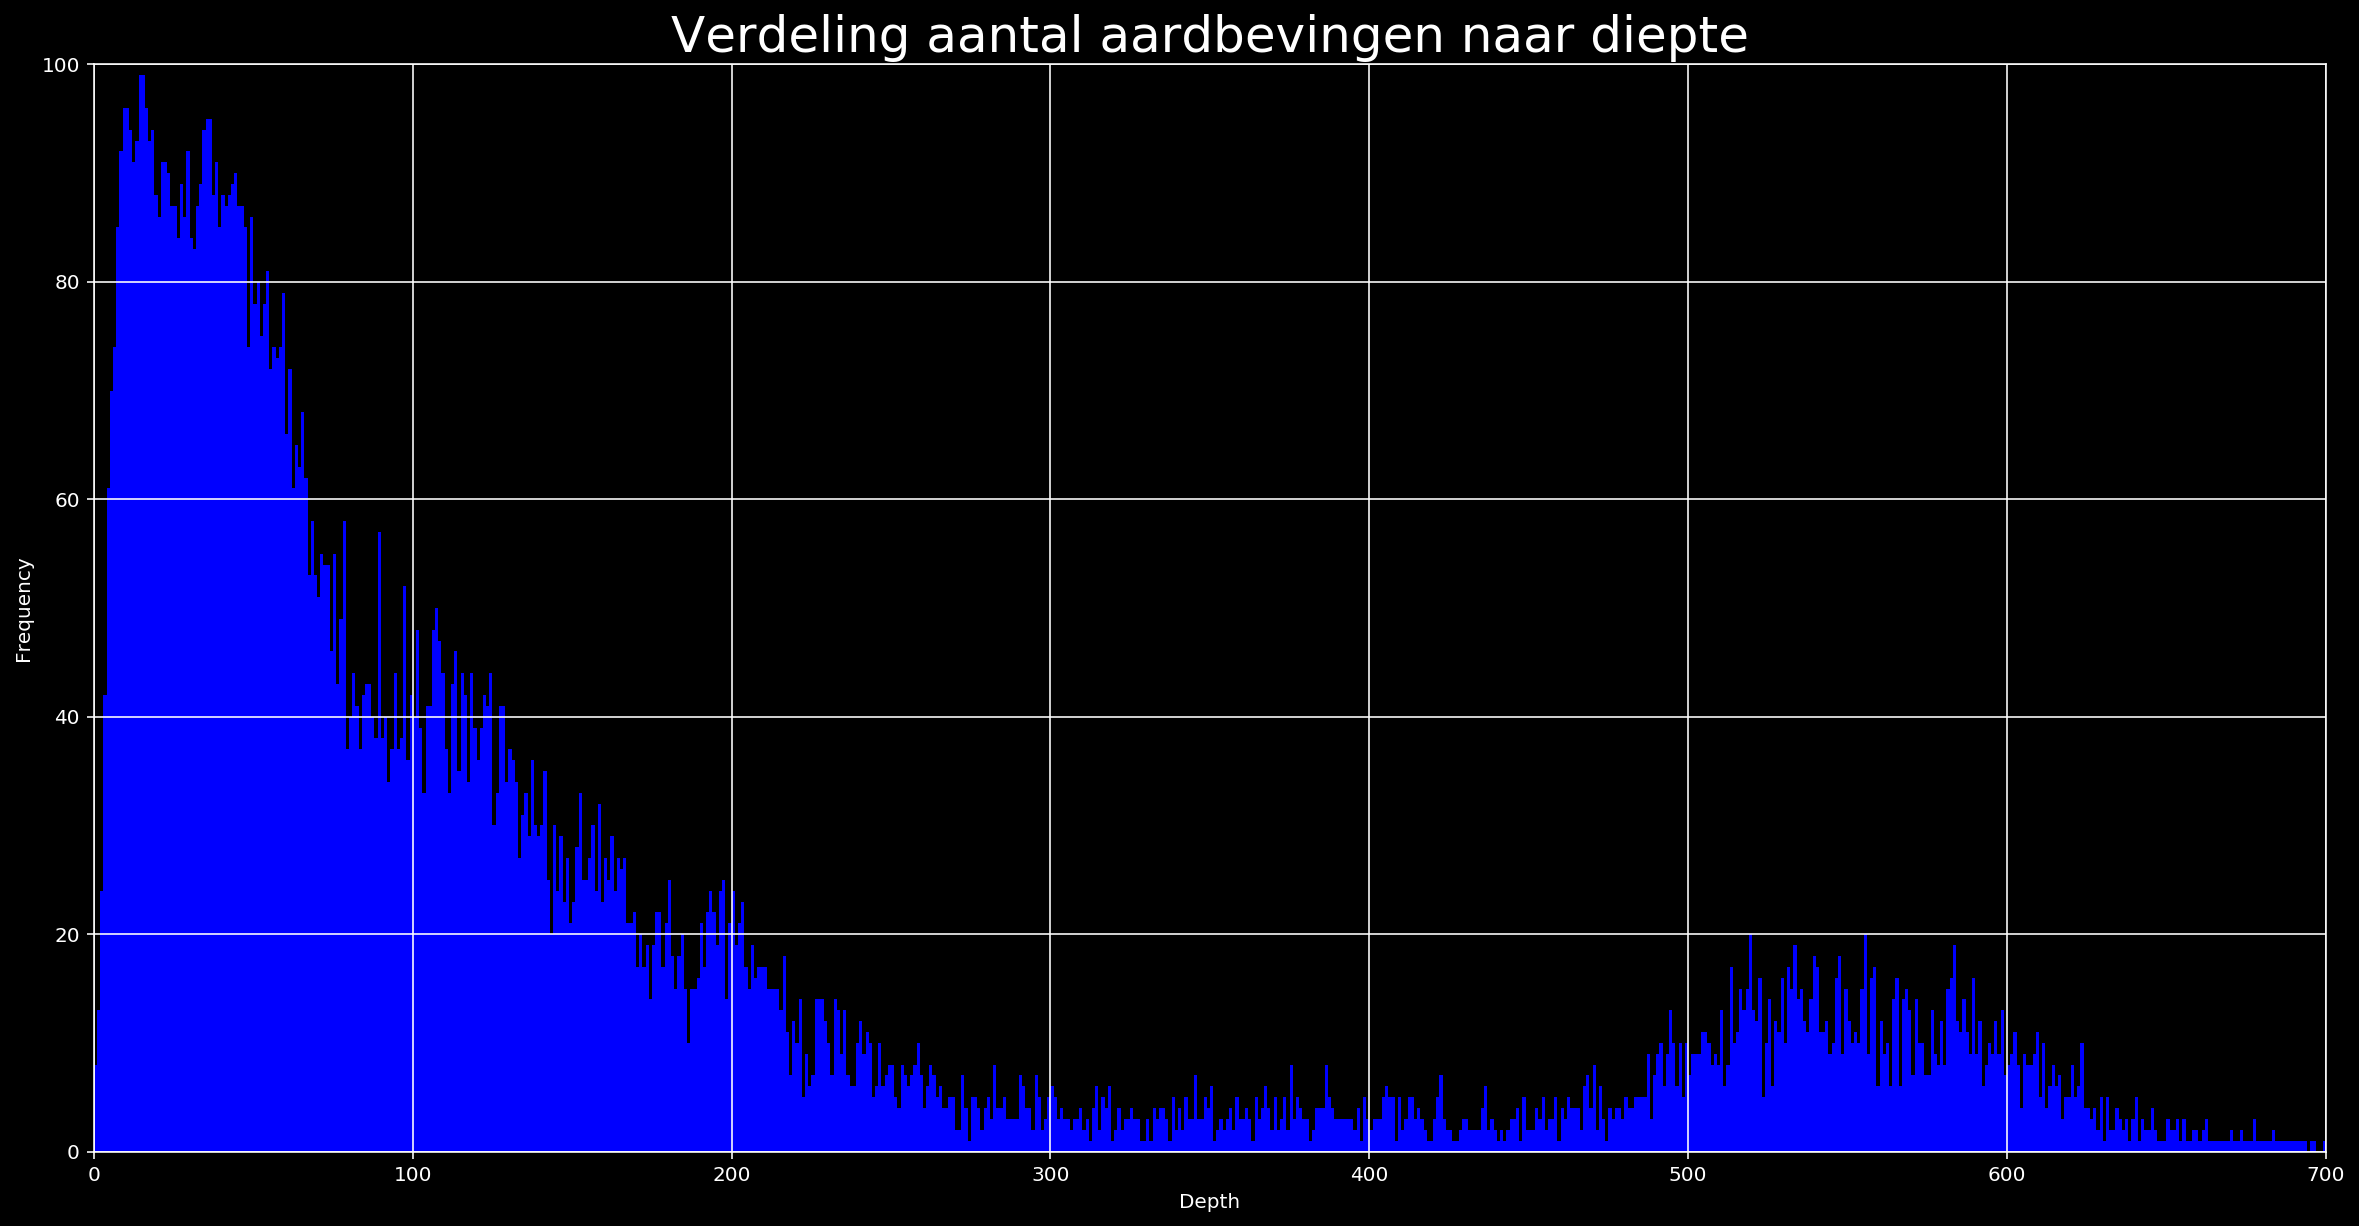

In [43]:
plot_aantal()

De meeste aardbevingen zijn op 33 km diepte, dit is de continentale korst.

##  Kun je een verband ontdekken tussen diepte en magnitude?

In [23]:
"""mean_magnitude"""
mean_mag = data[['depth', 'mag']].groupby('depth').mean()
mean_mag.head(20)

mag
depth           
0.0000  5.195783
0.1000  4.900000
0.1078  4.590000
0.2000  5.400000
0.5000  4.700000
0.6000  4.500000
0.7000  4.500000
0.9000  5.500000
1.0000  4.843784
1.1000  4.550000
1.3000  4.700000
1.3200  5.100000
1.4800  5.010000
1.5000  4.800000
1.5200  4.600000
1.6000  4.900000
1.6100  4.600000
1.6500  4.800000
1.7000  4.900000
1.8000  4.800000

##  Kun je een verband ontdekken tussen diepte en magnitude?

In [41]:
def plot_magnitude():
    plt.style.use('dark_background')
    plt.figure(figsize=(50,15))

    ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan = 1)
    plt.plot(mean_mag)                               
    plt.title('Gemiddelde magnitude', fontsize = 18)
    plt.xlabel('diepte')
    plt.ylabel('magnitude')
    plt.xlim(0,700)
    plt.ylim(4.5, 8.5)

    ax2 = plt.subplot2grid((3, 2), (1, 0), rowspan = 1)
    plt.title('Magnitude naar diepte', fontsize = 18)
    plt.scatter(data['depth'], data['mag'], color = 'w', alpha=0.2, marker='d')
    plt.xlim(0,700)
    plt.ylim(4.5, 8.5)
    plt.xlabel('diepte')
    plt.ylabel('magnitude')

    plt.show()

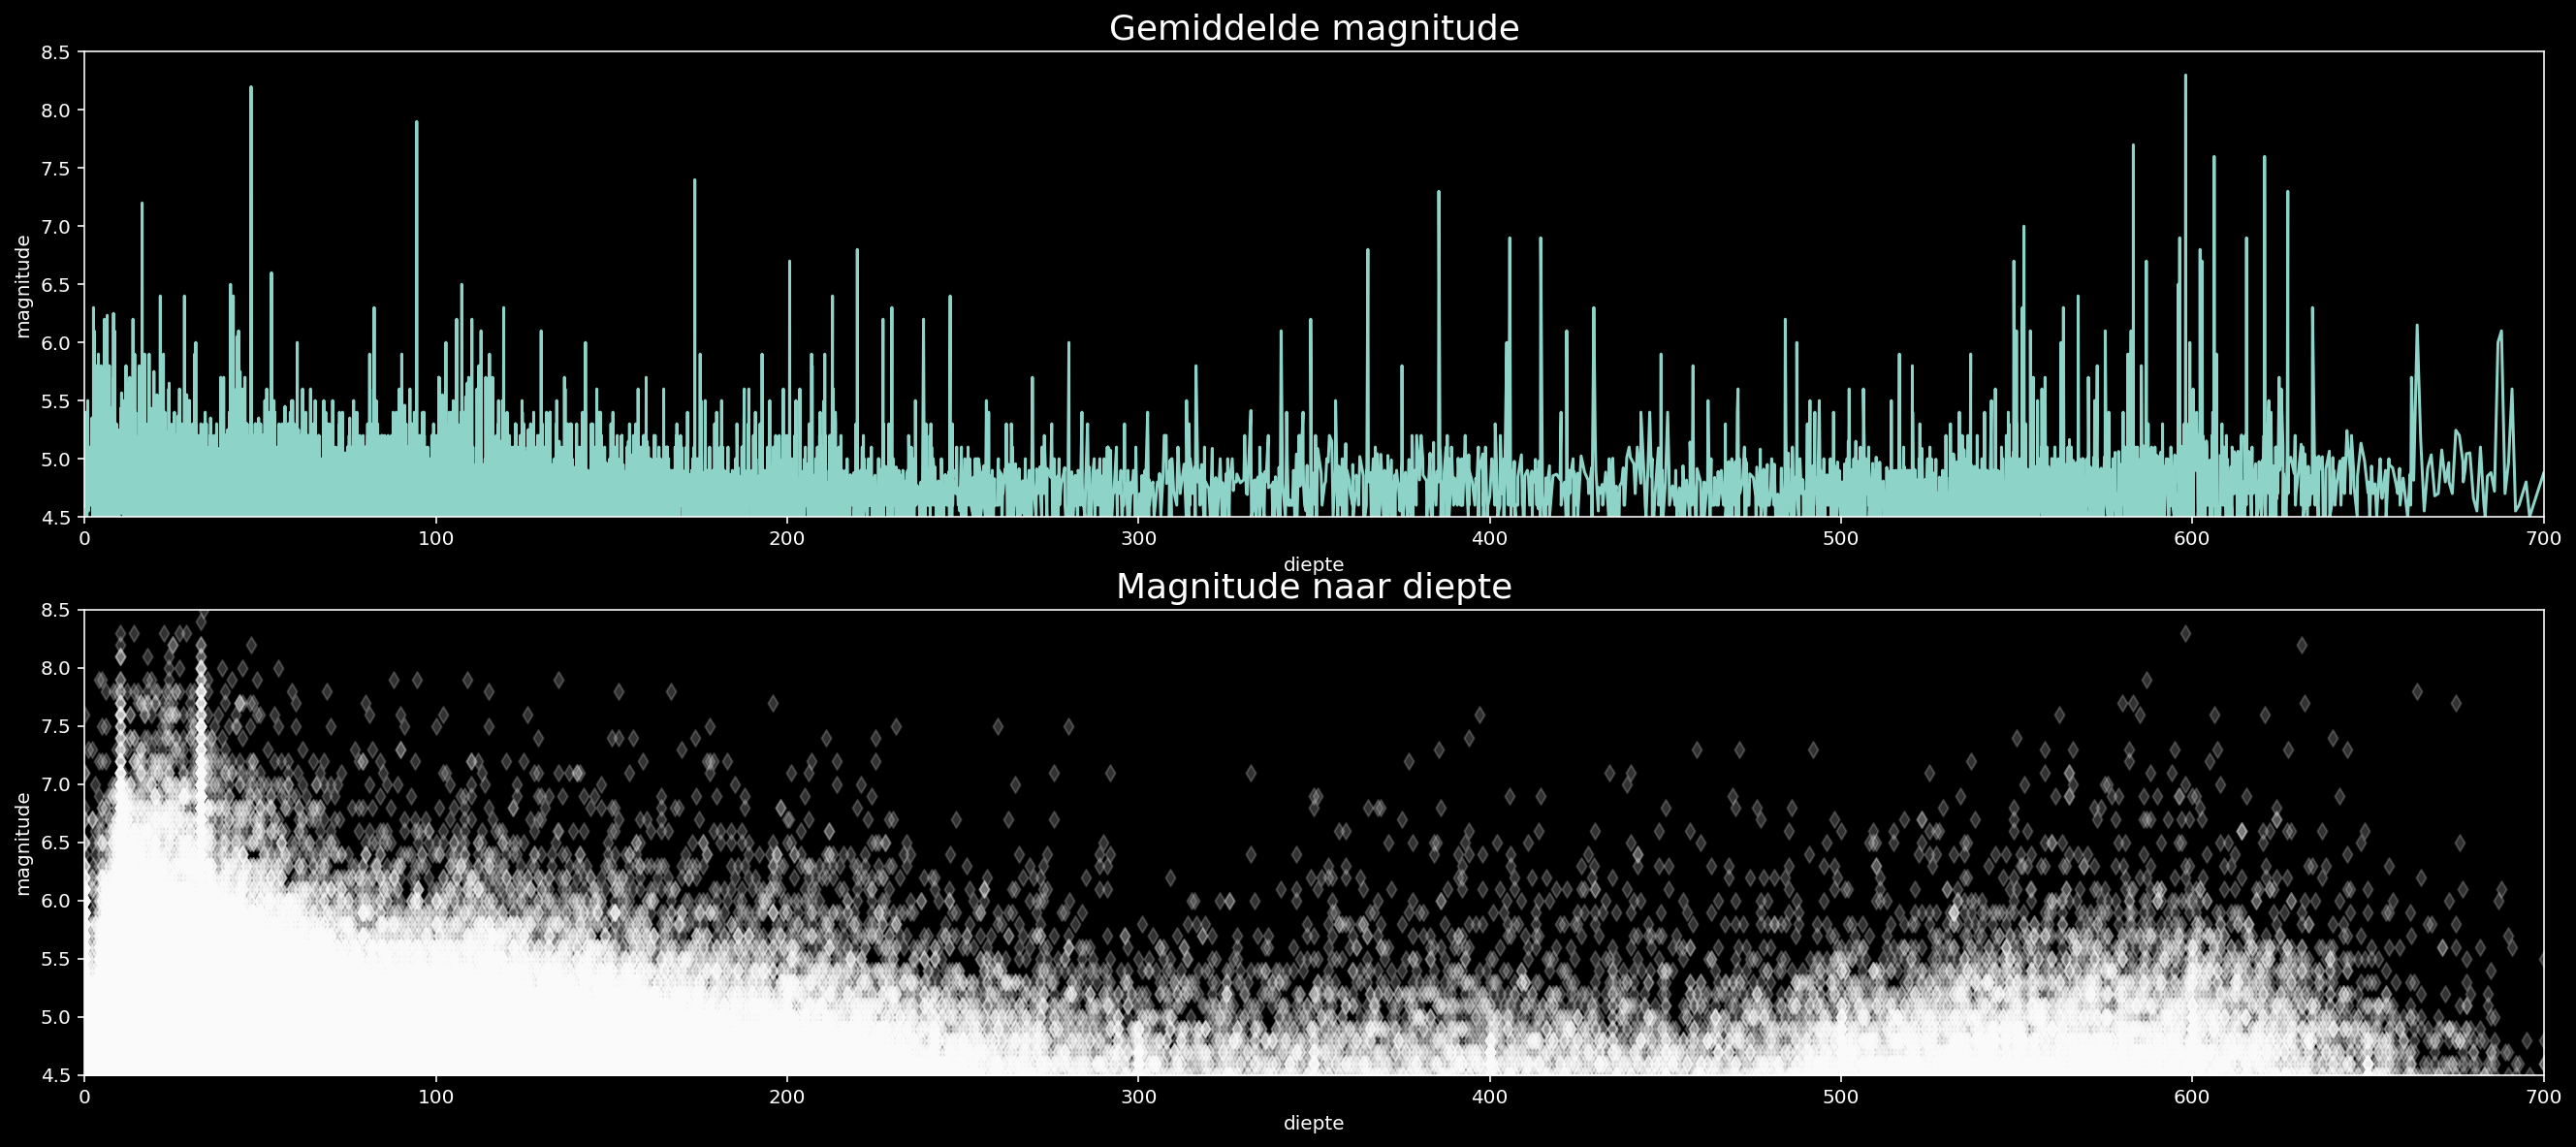

In [42]:
plot_magnitude()

op lagere diepte komen veel aardbevingen voor, maar in de mean_mag plot vlakt dit af: conclusie: op lagere diepte komen vooral veel relatief lichte bevingen voor. 

## Is het aantal aardbevingen rond Haiti toegenomen sinds 2010?

In [32]:
def plot_haiti():
    haiti = data.loc[data.latitude.between(16.791, 21.235)
                     & data.longitude.between(-75, -71)]
    
    yearly = (haiti['time'].dt.year  
              .value_counts()
              .reset_index())

    yearly.rename(columns={'index': 'year', 'time': 'counts'}, inplace=True)

    fig, ax = plt.subplots(figsize=(10, 10))
    sns.regplot(
        'year',
        'counts',
        data=yearly,
        fit_reg=True,
        robust=True,
        ax=ax,
        truncate=True)
    plt.xlim(1973, 2017)
    plt.title('Aantal aardbevingen in Haiti')
    plt.show()

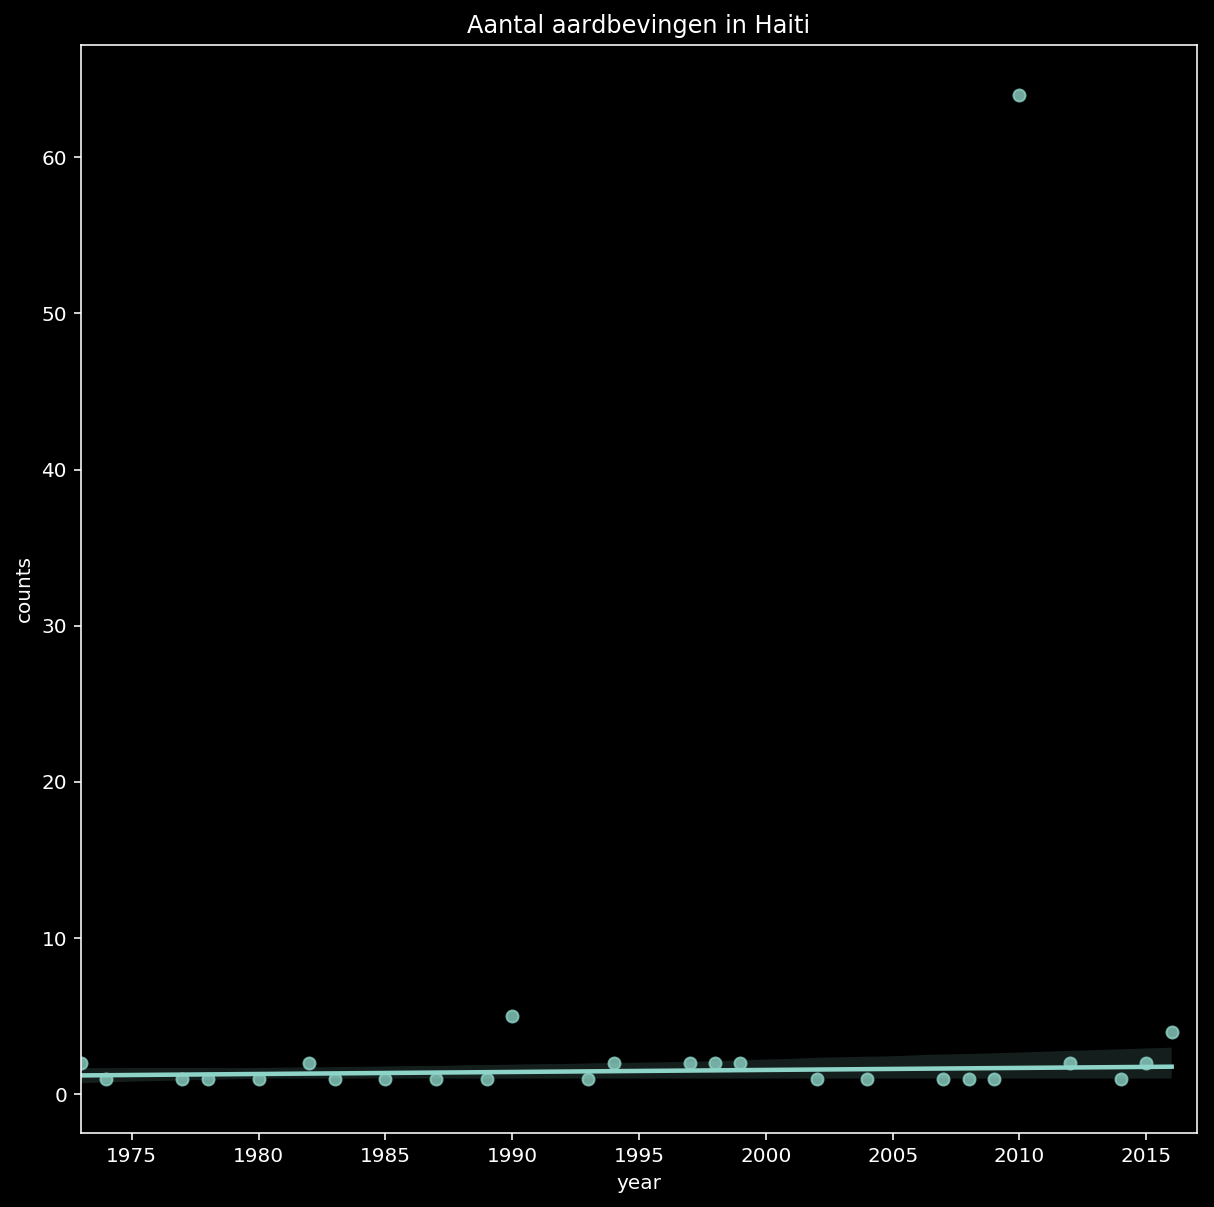

In [33]:
plot_haiti()

Er is een outlier in 2010 op 65. Afgezien daarvan is het aantal aardbevingen behoorlijk constant.

## En rond Kathmandu (Nepal) sinds 2015?

In [17]:
Nepal_7314 = data.loc[(data['latitude'].between(26, 28))
                         & (data['longitude'].between(84, 86))
                         &  data.time.dt.year.between(1973,2014)]
Nepal_1517 = data.loc[(data['latitude'].between(26, 28))
                         & (data['longitude'].between(84, 86))
                         &  data.time.dt.year.between(2015,2017)]

## En rond Kathmandu (Nepal) sinds 2015?

In [34]:
def plot_nepal():
    
    plt.figure(figsize=(30,20))
    
    # subplot1
    ax1 = plt.subplot2grid((2, 8), (1, 0), colspan = 7) #grid geometry + location
    plt.hist(Nepal_7314['time'].dt.year, bins=50, color='green', align='mid')
    
    ax1.set_ylabel("Aantal aardbevingen", fontsize=18)
    plt.title("Aardbevingen voor 2014", fontsize = 18)
    plt.xticks(range(1973,2014,1), rotation=45, fontsize=17)
    plt.yticks(range(6), ['0','1', '2', '3', '4', '5'])
    ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2d'))

    #subplot2
    ax2 = plt.subplot2grid((2, 8), (1, 7) , colspan = 1) #grid geometry + location
    plt.hist(Nepal_1517['time'].dt.year, align='right')
    plt.title("Aardbevingen na 2014", fontsize = 18)
    
    plt.xticks([2015,2016,2017], rotation=45, fontsize=17)
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2d'))
    plt.ylim([0,5])
    
    plt.show()

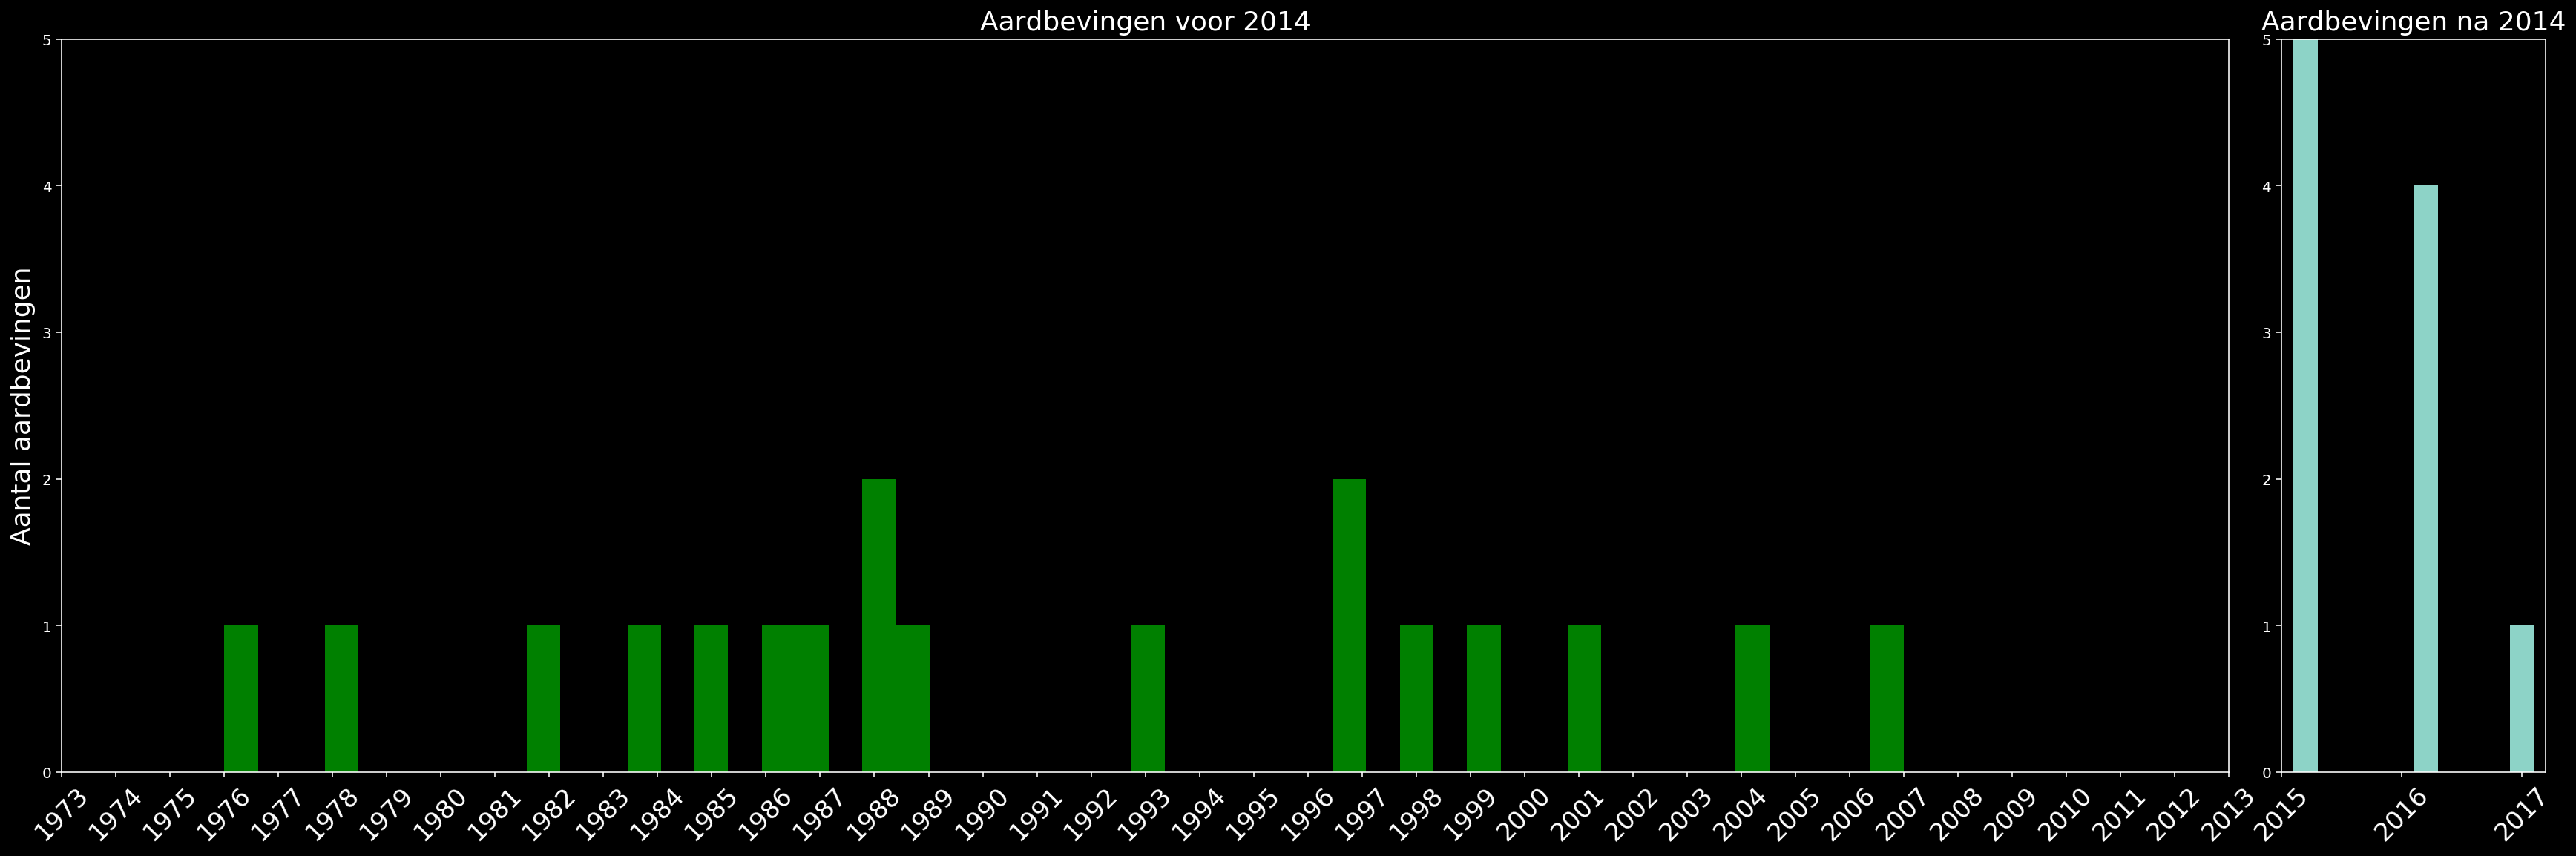

In [35]:
plot_nepal()

Voor 2015 zijn er eigenlijk weinig aardbevingen en niet eens elk jaar. Na 2015 keert het ook weer terug naar het oude niveau.

<h1 align="center"><u>Presentatie project</u></h1>
<h1 align="center">Earthquakes</h1> 
<h1 align="center"></h1>
<h1 align="center"></h1>
<h2 align="center">Eventuele vragen?</h2> 